In [21]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
raw_df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
raw_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
raw_df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [5]:
raw_df['Resume'] = raw_df['Resume'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore'))

In [6]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
raw_df['cleaned_resume'] = raw_df.Resume.apply(lambda x: cleanResume(x))

In [8]:
raw_df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [9]:
df = raw_df.copy()

In [10]:
def remove_stopwords (word_list: list):
    
    oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
    
    required_words = nltk.word_tokenize(word_list)
    total_words = []

    for word in required_words:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            total_words.append(word)
            
    return total_words

In [11]:
common_word_list = remove_stopwords (' '.join(df['cleaned_resume'].values))

In [12]:
common_word_list

['Skills',
 'Programming',
 'Languages',
 'Python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'Sql',
 'Java',
 'JavaScript',
 'JQuery',
 'Machine',
 'learning',
 'Regression',
 'SVM',
 'Na',
 'Bayes',
 'KNN',
 'Random',
 'Forest',
 'Decision',
 'Trees',
 'Boosting',
 'techniques',
 'Cluster',
 'Analysis',
 'Word',
 'Embedding',
 'Sentiment',
 'Analysis',
 'Natural',
 'Language',
 'processing',
 'Dimensionality',
 'reduction',
 'Topic',
 'Modelling',
 'LDA',
 'NMF',
 'PCA',
 'Neural',
 'Nets',
 'Database',
 'Visualizations',
 'Mysql',
 'SqlServer',
 'Cassandra',
 'Hbase',
 'ElasticSearch',
 'D3',
 'js',
 'DC',
 'js',
 'Plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'Tableau',
 'Others',
 'Regular',
 'Expression',
 'HTML',
 'CSS',
 'Angular',
 '6',
 'Logstash',
 'Kafka',
 'Python',
 'Flask',
 'Git',
 'Docker',
 'computer',
 'vision',
 'Open',
 'CV',
 'understanding',
 'Deep',
 'learning',
 'Education',
 'Details',
 'Data',
 'Science',
 'Assurance',
 'Associate',

In [13]:
def get_frequency_dist (word_list: list):
    
    word_freq = nltk.FreqDist(word_list)
    plt.figure(figsize=(15, 5))
    word_freq.plot(50, cumulative=False)
    
    return word_freq.most_common(50)

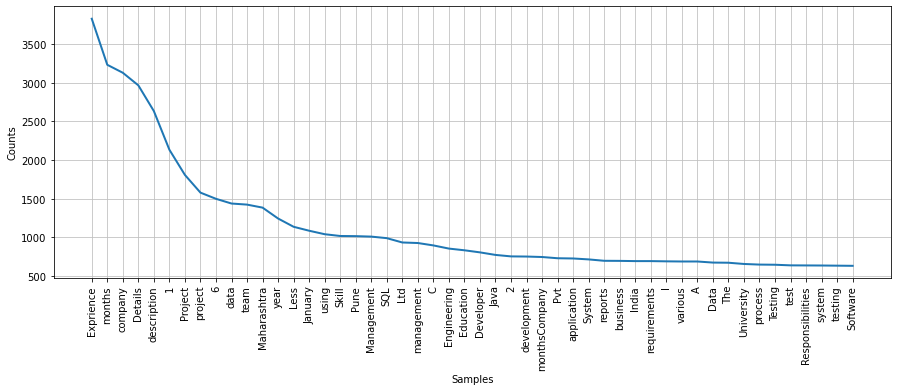

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [14]:
common_word_freq = get_frequency_dist(common_word_list)
print(common_word_freq)

In [15]:
# Encoding the values.
lb_encd = LabelEncoder()
for i in ['Category']:
    df[i] = lb_encd.fit_transform(df[i])

In [16]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [17]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
len(df['Category'].unique())

25

In [20]:
requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english'
)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

X_train,X_test,y_train,y_test = train_test_split(
    WordFeatures,
    requiredTarget,
    random_state = 42, 
    test_size = 0.2,
    shuffle=True, 
    stratify=requiredTarget
)

print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


In [22]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9948186528497409
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      